<a href="https://colab.research.google.com/github/kiran-bhandari16/LSTM-Stock-Price-Prediciton/blob/main/Sentiment_Analysis_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.metrics import plot_roc_curve
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import re
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Embedding, Dropout
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences


In [3]:
from google.colab import files
uploaded = files.upload()

Saving economicalSentiment.csv to economicalSentiment.csv


In [4]:
df=pd.read_csv('economicalSentiment.csv')

In [5]:
df.head()

,Date,News Headline,Sentiment,Score
0,2018-06-1,Mustard oil to become dearer by Rs 15 per liter,Positive,0.4404
1,2018-06-1,Nepse slides further,Neutral,0.0000
2,2018-06-1,VAT on brokerage service charge scrapped,Neutral,0.0000
3,2018-06-1,"U.S. allies hit back at Washington's steel, al...",Neutral,0.0000
4,2018-06-1,Minister of State Baskota calls for proper gui...,Neutral,0.0000


In [6]:
df.drop('Date',axis=1, inplace=True)
df.head()

,News Headline,Sentiment,Score
0,Mustard oil to become dearer by Rs 15 per liter,Positive,0.4404
1,Nepse slides further,Neutral,0.0000
2,VAT on brokerage service charge scrapped,Neutral,0.0000
3,"U.S. allies hit back at Washington's steel, al...",Neutral,0.0000
4,Minister of State Baskota calls for proper gui...,Neutral,0.0000


In [9]:
# df.drop("Score", axis=1, inplace=True)
df.head()

,News Headline,Sentiment,Score
0,Mustard oil to become dearer by Rs 15 per liter,Positive,0.4404
1,Nepse slides further,Neutral,0.0000
2,VAT on brokerage service charge scrapped,Neutral,0.0000
3,"U.S. allies hit back at Washington's steel, al...",Neutral,0.0000
4,Minister of State Baskota calls for proper gui...,Neutral,0.0000


In [11]:
# df.drop('Score', axis=1,inplace=True)
df.columns

Index(['News Headline', 'Sentiment', ' Score'], dtype='object')

In [14]:
df.tail()

,News Headline,Sentiment,Score
743,Stocks close flat despite improved market acti...,Negative,-0.3724
744,Taskforce finds organized crime in heli-rescue...,Negative,-0.8020
745,Hearings committee puts off decision on Joshee,Neutral,0.0000
746,Is delay in confirming CJ nominee a threat to ...,Negative,-0.6908
747,Bilateral mechanism active to implement Nepal-...,Positive,0.4939


In [15]:
df.to_csv("updated-economicalSentiment.csv", index=False)

In [16]:
df=pd.read_csv("updated-economicalSentiment.csv")


In [17]:
# df.to_csv("NewsSentiment.csv",index=False)

In [18]:
df.head()

,News Headline,Sentiment,Score
0,Mustard oil to become dearer by Rs 15 per liter,Positive,0.4404
1,Nepse slides further,Neutral,0.0000
2,VAT on brokerage service charge scrapped,Neutral,0.0000
3,"U.S. allies hit back at Washington's steel, al...",Neutral,0.0000
4,Minister of State Baskota calls for proper gui...,Neutral,0.0000


In [ ]:
# df.drop("Date",axis=1,inplace=True)
# df.drop("Sentiment Score", axis=1, inplace=True)
# df.head()

In [ ]:
# df.to_csv("NewsSentiment.csv",index=False)

In [19]:
df.value_counts()

News Headline                                                                        Sentiment   Score 
RJPN mulling to walk out of Province 2 govt                                          Neutral     0.0000    2
Road mania grips local levels: Over half of budget for road projects                 Neutral     0.0000    2
Govt mulls allowing Nepal Army to revive Hetauda Textile Industry                    Positive    0.3400    2
Nepal, India to make concerted bid to complete two cross-border rail lines           Neutral     0.0000    2
Province 1 budget criticized for being tarai-centric                                 Negative   -0.3612    2
                                                                                                          ..
Govt to&nbsp;provide Rs 500,000 relief to tipper&nbsp;accident&nbsp;victim families  Positive    0.4767    1
Govt treasury empty after haphazard spending in last month                           Neutral     0.0000    1
Govt will work with pvt 

In [20]:
df.shape

(748, 3)

In [21]:
df=df.sample(frac=1).reset_index(drop=True)
df.head()

,News Headline,Sentiment,Score
0,Agenda of PM Oli's China visit finalized,Neutral,0.0000
1,Ministry sets 10 milestone activities to attra...,Positive,0.3612
2,Civil Bank supports Damak school,Positive,0.3612
3,"5% TDS on vegetable, fruit traders to promote ...",Positive,0.3818
4,Nepal-India to address problems of ongoing bil...,Negative,-0.4019


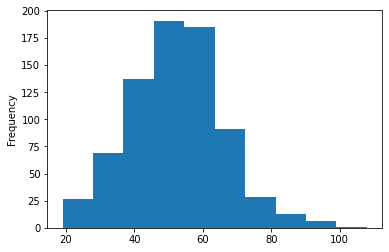

In [22]:
# plotting the lenght of news headline
df["News Headline"].str.len().plot.hist()

In [23]:
df["Sentiment"].value_counts()

Neutral     388
Positive    185
Negative    175
Name: Sentiment, dtype: int64

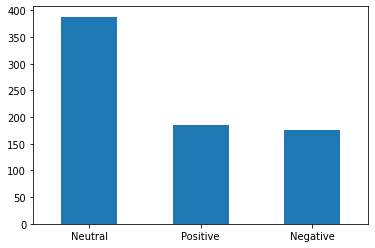

In [24]:
df["Sentiment"].value_counts().plot.bar()
plt.xticks(rotation=0);

In [30]:
# data preprocessing
df["News Headline"].apply(lambda x: x.lower())
df["News Headline"] = df["News Headline"].apply(lambda x: re.sub('[^a-zA-z0-9\s]',"",x))
df['News Headline'].head()

0              Agenda of PM Olis China visit finalized
1    Ministry sets 10 milestone activities to attra...
2                     Civil Bank supports Damak school
3    5 TDS on vegetable fruit traders to promote ta...
4    NepalIndia to address problems of ongoing bila...
Name: News Headline, dtype: object

In [31]:
df.head()

,News Headline,Sentiment,Score
0,Agenda of PM Olis China visit finalized,Neutral,0.0000
1,Ministry sets 10 milestone activities to attra...,Positive,0.3612
2,Civil Bank supports Damak school,Positive,0.3612
3,5 TDS on vegetable fruit traders to promote ta...,Positive,0.3818
4,NepalIndia to address problems of ongoing bila...,Negative,-0.4019


In [32]:
tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(df["News Headline"].values)

X=tokenizer.texts_to_sequences(df["News Headline"].values)
X=pad_sequences(X)
X[:10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0, 868,   3,  10, 168,
         16,  46, 869],
       [  0,   0,   0,   0,   0,   0, 169, 321, 322, 870, 871,   1, 513,
        323,  57, 324],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  76,  35,
        872, 873, 325],
       [  0,   0,   0,   0, 109, 874,   5, 326, 875, 226,   1, 170, 227,
        876, 228, 877],
       [  0,   0,   0,   0,   0,   0,   0,   0, 327,   1, 229, 328,   3,
        514, 230,  58],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 515,  35, 878,  20,
        329,  24, 879],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 880, 330,   2,
         29, 331, 881],
       [  0,   0,   0,   0,   0,   0,   0,   0,   6, 882,   5,  20, 227,
        332,   4, 171],
       [  0,   0,   0,   0,   0,   0,   0,   0,  59, 333, 883, 884, 885,
         21, 110,  12],
       [  0,   0,   0,   0,   0,   0,   0,   0,  16, 886, 887, 231,  50,
          1, 888, 516]], dtype=int32)

In [35]:
X.shape

(748, 16)

In [36]:
model=Sequential()
model.add(Embedding(5000,256,input_length=X.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(256, return_sequences=True,dropout=0.2,recurrent_dropout=0.1))
model.add(LSTM(256, dropout=0.2,recurrent_dropout=0.1))
model.add(Dense(3, activation='softmax'))

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 16, 256)           1280000   
                                                                 
 dropout (Dropout)           (None, 16, 256)           0         
                                                                 
 lstm (LSTM)                 (None, 16, 256)           525312    
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dense (Dense)               (None, 3)                 771       
                                                                 
Total params: 2,331,395
Trainable params: 2,331,395
Non-trainable params: 0
_________________________________________________________________


In [38]:
y=pd.get_dummies(df["Sentiment"]).values
[print(df["Sentiment"][i],y[i]) for i in range(0,7)]


Neutral [0 1 0]
Positive [0 0 1]
Positive [0 0 1]
Positive [0 0 1]
Negative [1 0 0]
Neutral [0 1 0]
Neutral [0 1 0]


[None, None, None, None, None, None, None]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [40]:
batch_size=64
epochs=10
model.fit(X_train,y_train, epochs=epochs,batch_size=batch_size,verbose=2)

Epoch 1/10
10/10 - 10s - loss: 1.0386 - accuracy: 0.4833 - 10s/epoch - 1s/step
Epoch 2/10
10/10 - 4s - loss: 1.0089 - accuracy: 0.5217 - 4s/epoch - 393ms/step
Epoch 3/10
10/10 - 4s - loss: 0.9415 - accuracy: 0.5268 - 4s/epoch - 394ms/step
Epoch 4/10
10/10 - 4s - loss: 0.6664 - accuracy: 0.7258 - 4s/epoch - 391ms/step
Epoch 5/10
10/10 - 4s - loss: 0.3091 - accuracy: 0.9314 - 4s/epoch - 398ms/step
Epoch 6/10
10/10 - 4s - loss: 0.1020 - accuracy: 0.9682 - 4s/epoch - 399ms/step
Epoch 7/10
10/10 - 4s - loss: 0.0375 - accuracy: 0.9900 - 4s/epoch - 393ms/step
Epoch 8/10
10/10 - 4s - loss: 0.0182 - accuracy: 0.9950 - 4s/epoch - 408ms/step
Epoch 9/10
10/10 - 4s - loss: 0.0050 - accuracy: 1.0000 - 4s/epoch - 411ms/step
Epoch 10/10
10/10 - 4s - loss: 0.0039 - accuracy: 1.0000 - 4s/epoch - 408ms/step


In [42]:
predictions=model.predict(X_test)

In [43]:
predictions

array([[2.03271247e-02, 9.55361724e-01, 2.43112613e-02],
       [1.18367337e-02, 1.65918132e-03, 9.86504078e-01],
       [4.05817688e-01, 2.62009174e-01, 3.32173139e-01],
       [3.25528958e-07, 9.99999285e-01, 3.70087236e-07],
       [4.68578128e-06, 9.99985695e-01, 9.68673612e-06],
       [3.82830724e-02, 7.24767506e-01, 2.36949414e-01],
       [2.11903430e-03, 9.96823788e-01, 1.05717906e-03],
       [8.46866667e-01, 7.68124824e-03, 1.45452097e-01],
       [2.20909968e-01, 5.30937195e-01, 2.48152867e-01],
       [3.43795717e-01, 3.28139007e-01, 3.28065306e-01],
       [2.83136308e-01, 5.04693925e-01, 2.12169707e-01],
       [9.99783337e-01, 4.82018477e-05, 1.68540631e-04],
       [2.92978984e-05, 9.99920011e-01, 5.06305332e-05],
       [7.18650932e-04, 9.96751904e-01, 2.52942694e-03],
       [7.78053522e-01, 4.00025398e-02, 1.81943953e-01],
       [1.28415224e-04, 9.99702156e-01, 1.69315826e-04],
       [8.90034199e-01, 1.17428508e-02, 9.82228965e-02],
       [1.32166091e-02, 9.58096

In [45]:
[print(df['News Headline'][i], predictions[i], y_test[i]) for i in range(0,7)]

Agenda of PM Olis China visit finalized [0.02032712 0.9553617  0.02431126] [0 1 0]
Ministry sets 10 milestone activities to attract Indian Chinese tourists [0.01183673 0.00165918 0.9865041 ] [0 1 0]
Civil Bank supports Damak school [0.4058177  0.26200917 0.33217314] [0 1 0]
5 TDS on vegetable fruit traders to promote tax compliance Revenue secy [3.2552896e-07 9.9999928e-01 3.7008724e-07] [0 1 0]
NepalIndia to address problems of ongoing bilateral projects [4.6857813e-06 9.9998569e-01 9.6867361e-06] [0 0 1]
Everest Bank inaugurates new branch at Sitapaila [0.03828307 0.7247675  0.23694941] [0 1 0]
Budget transfer only in the last trimester [0.00211903 0.9968238  0.00105718] [1 0 0]


[None, None, None, None, None, None, None]